## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import math

## Reading CSV File



In [3]:
df = pd.read_csv('winequality-red.csv')
df.iloc[:,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Part (i) => Modifying DataFrame


In [4]:
#Making new column Quality comprising 0 and 1
df['Quality']=df['quality']>=7
df.Quality = df.Quality.replace({True: 1, False: 0})
df=df.drop(axis=1,columns=["quality"])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Part (ii) => Pre-Processing


Dealing With Nan


In [5]:
#There are no null values no Null Value Replacement needed
df.isnull().values.any()



False

 Correlation matrix


In [6]:
# Calculating the correlation matrix and sorting them on basis of relation with Quality
correlation_matrix = df.corr(numeric_only=True)
Quality_correlation = correlation_matrix['Quality'].sort_values(ascending=False)
print(Quality_correlation)


Quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: Quality, dtype: float64


Dealing With Outliers


In [7]:
def remove_outliers_zscore(df, features, z_score_threshold):
    df_not_outliers = df.copy()  
    
    for feature in features:
        mean = df[feature].mean()
        stddev= df[feature].std()
        df_not_outliers[f'{feature}_z_score'] = (df[feature] - mean) / stddev

        # Removing outliers
        outliers = df_not_outliers[abs(df_not_outliers[f'{feature}_z_score']) > z_score_threshold]
        df_not_outliers = df_not_outliers[abs(df_not_outliers[f'{feature}_z_score']) <= z_score_threshold]

        print(f"Number of outliers removed for {feature}:", len(outliers))
        print(f"Z-Score Threshold for {feature}:", z_score_threshold)

    return df_not_outliers.drop(columns=[f'{feature}_z_score' for feature in features])


list= df.columns.tolist()
df = remove_outliers_zscore(df, features=list, z_score_threshold=5)
df.head(100)


Number of outliers removed for fixed acidity: 0
Z-Score Threshold for fixed acidity: 5
Number of outliers removed for volatile acidity: 1
Z-Score Threshold for volatile acidity: 5
Number of outliers removed for citric acid: 0
Z-Score Threshold for citric acid: 5
Number of outliers removed for residual sugar: 11
Z-Score Threshold for residual sugar: 5
Number of outliers removed for chlorides: 22
Z-Score Threshold for chlorides: 5
Number of outliers removed for free sulfur dioxide: 0
Z-Score Threshold for free sulfur dioxide: 5
Number of outliers removed for total sulfur dioxide: 2
Z-Score Threshold for total sulfur dioxide: 5
Number of outliers removed for density: 0
Z-Score Threshold for density: 5
Number of outliers removed for pH: 0
Z-Score Threshold for pH: 5
Number of outliers removed for sulphates: 5
Z-Score Threshold for sulphates: 5
Number of outliers removed for alcohol: 0
Z-Score Threshold for alcohol: 5
Number of outliers removed for Quality: 0
Z-Score Threshold for Quality: 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.9967,3.29,0.51,9.2,0
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,0
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,0
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.9969,3.21,0.69,9.3,0


Normalisation

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,0.247788,0.479339,0.000000,0.123457,0.248062,0.149254,0.176101,0.588728,0.565217,0.223301,0.153846,0.0
1,0.283186,0.628099,0.000000,0.209877,0.333333,0.358209,0.383648,0.512567,0.295652,0.339806,0.215385,0.0
2,0.283186,0.528926,0.050633,0.172840,0.310078,0.208955,0.301887,0.527799,0.347826,0.310680,0.215385,0.0
3,0.584071,0.132231,0.708861,0.123457,0.244186,0.238806,0.339623,0.603960,0.260870,0.242718,0.215385,0.0
4,0.247788,0.479339,0.000000,0.123457,0.248062,0.149254,0.176101,0.588728,0.565217,0.223301,0.153846,0.0


## Part (iii) => Implementing Algorithms

Splitting Training and Test data

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Quality'])  
y = df['Quality']  

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1246, 11)
Shape of X_test: (312, 11)
Shape of y_train: (1246,)
Shape of y_test: (312,)


## (a) => Logistic Regression (Using Sklearn)

Constructing The Model

In [10]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train) #Training the model

LogisticRegression()

Predicting Result

In [11]:
y_pred1 = logistic_model.predict(X_test)

## (b) => K-Nearest Neighbours

Constructing The Model

In [12]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(1)	
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Predicting Result

In [13]:
y_pred2 = knn.predict(X_test)

## (c) => Decision Tree Classifier

Constructing Model

In [14]:
from sklearn import tree
model1 =tree.DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

Predicting Result

In [15]:
y_pred3 = model1.predict(X_test)

## (d) => Random Forest Classifier

Constructing Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

Predicting Result

In [17]:
y_pred4 = model2.predict(X_test)

## (e) => Logistic Regression from Scratch

Sigmoid Function and Hypothesis

In [18]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, W):
    return sigmoid(np.dot(X, W))

Cost function


In [19]:
def cost_function(X, y, W):
    m = len(y)
    h = hypothesis(X, W)
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

Gradient Descent

In [20]:
def gradient_descent(X, y, W, learning_rate, num_epochs):
    m = len(y)
    cost_history = []

    for _ in range(num_epochs):
        h = hypothesis(X, W)
        gradient = np.dot(X.T, (h - y)) / m
        W -= learning_rate * gradient
        cost = cost_function(X, y, W)
        cost_history.append(cost)

    return W, cost_history


Implementation

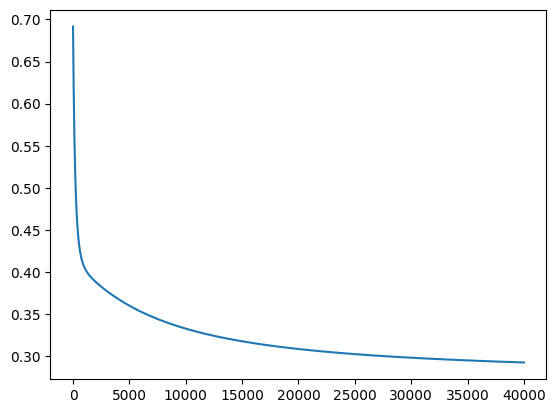

In [21]:
W = np.zeros(X.shape[1])
learning_rate = 0.01
num_epochs = 40000

# Perform gradient descent
W, cost_history = gradient_descent(X_train, y_train, W, learning_rate, num_epochs)

def predict(X_test, W, threshold=0.5):
    probabilities = hypothesis(X_test, W)
    predictions = (probabilities >= threshold).astype(int)
    return predictions
plt.plot(cost_history)


Predicting Result

In [22]:
y_pred5 = predict(X_test, W)

## Part (4) => Evaluation And Plotting

(a) => Logistic Regression Using Sklearn

Accuracy:  88.78205128205127
f1 score:  0.36363636363636365


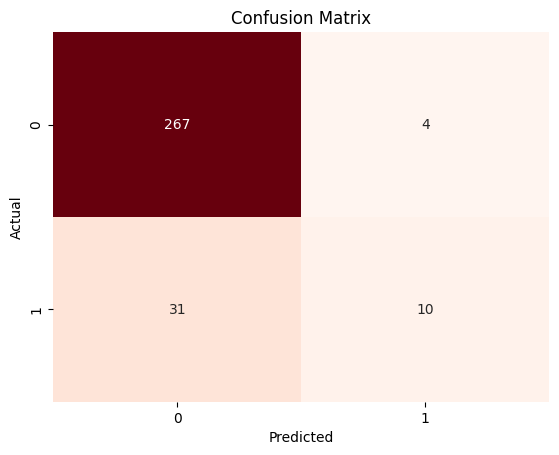

In [23]:
# Printing Accuracy and f1 score
print("Accuracy: ",accuracy_score(y_test,y_pred1)*100)
print("f1 score: ",f1_score(y_test,y_pred1))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



(b) => K- Nearest Neighbours

Accuracy:  91.66666666666666
f1 score:  0.6578947368421052


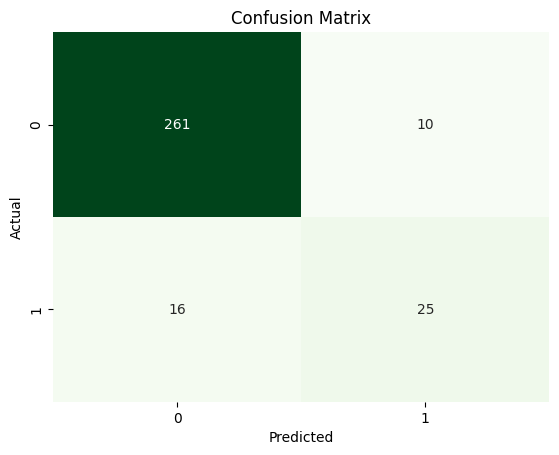

In [24]:
# Printing Accuracy and f1 score
print("Accuracy: ",accuracy_score(y_test,y_pred2)*100)
print("f1 score: ",f1_score(y_test,y_pred2))


# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



(c) => Decision Tree Classifier

Accuracy:  87.82051282051282
f1 score:  0.5869565217391304


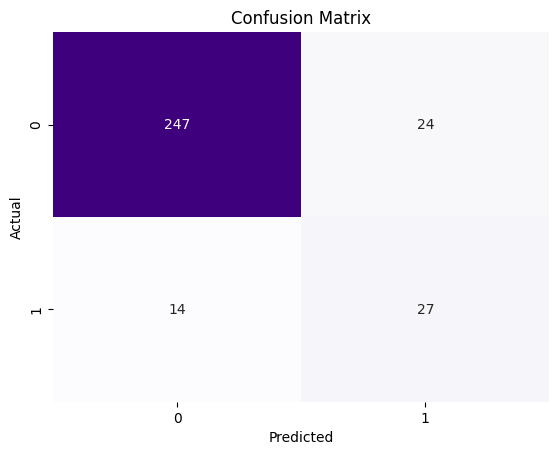

In [25]:
# Printing Accuracy and f1 score
print("Accuracy: ",accuracy_score(y_test,y_pred3)*100)
print("f1 score: ",f1_score(y_test,y_pred3))


# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



(d) => Random Forest Classifier

Accuracy:  92.94871794871796
f1 score:  0.6666666666666667


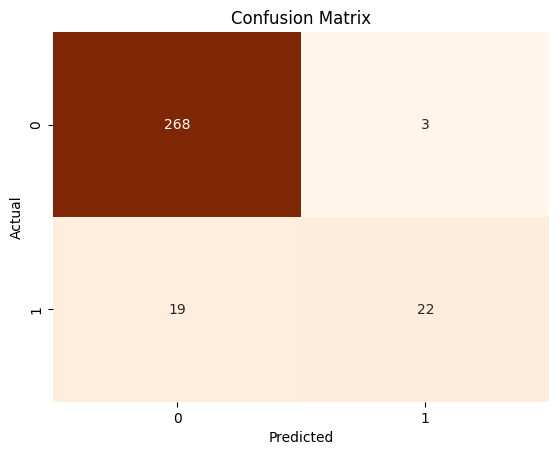

In [26]:
# Printing Accuracy and f1 score
print("Accuracy: ",accuracy_score(y_test,y_pred4)*100)
print("f1 score: ",f1_score(y_test,y_pred4))


# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



(e) => Logistic Regression From scratch

Accuracy:  88.46153846153845
f1 score:  0.35714285714285715


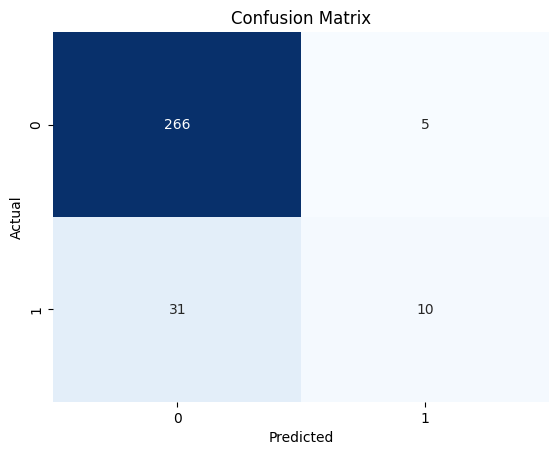

In [27]:
# Printing Accuracy and f1 score
print("Accuracy: ",accuracy_score(y_test,y_pred5)*100)
print("f1 score: ",f1_score(y_test,y_pred5))


# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
